In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Heart Attack Analysis & Prediction Dataset

Link to the data set: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [7]:
data = pd.read_csv("D:\\Desktop\R by me\heart.csv")

In [8]:
print(data.shape)

(303, 14)


This data set has a 303 data points, and each data point has 14 different variables associated with it

In [9]:
print(data.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


Age : Age of the patient
Sex : Sex of the patient
cp : Chest Pain type chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg : resting electrocardiographic results
        Value 0: normal        
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)        
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalachh : maximum heart rate achieved
xang: exercise induced angina (1 = yes; 0 = n
oldpeak: Previous peakoslp: Slope)

caa: number of major vessels (0-
thall: Thal rate3)
Output : 0= less chance of heart attack 1= more chance of heart attaack

nue 0: normal

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


These statistics provide valuable insights into the distribution and central tendency of the data in each column. This allows understand the range, spread, and typical values for the dataset's features.

In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [12]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


This provides useful details about the DataFrame's structure, the number of rows and columns, the data types of each column, and whether there are any missing values. 

In [14]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


There are no any missing values

In [15]:
print(data.duplicated().sum())

1


There are one duplicate raw.

In [16]:
data = data.drop_duplicates()

In [17]:
print(data.duplicated().sum())


0


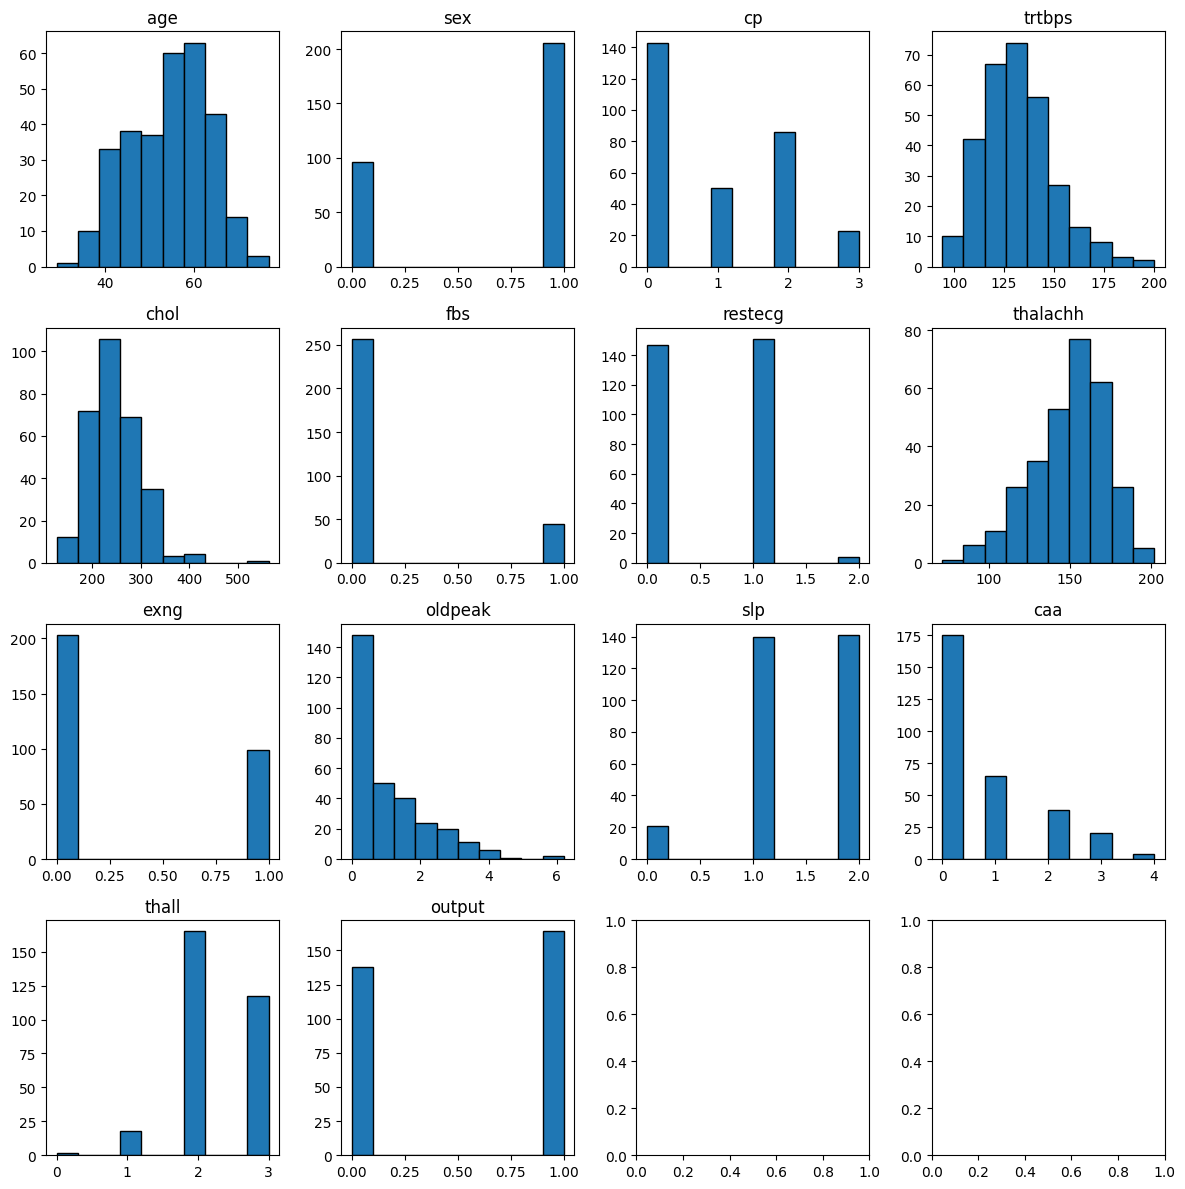

In [18]:
# Plot histograms for each variable
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()

for i, column in enumerate(data.columns):
    axs[i].hist(data[column], bins=10, edgecolor='black')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

each histogram represents the distribution of a specific variable from the data DataFrame

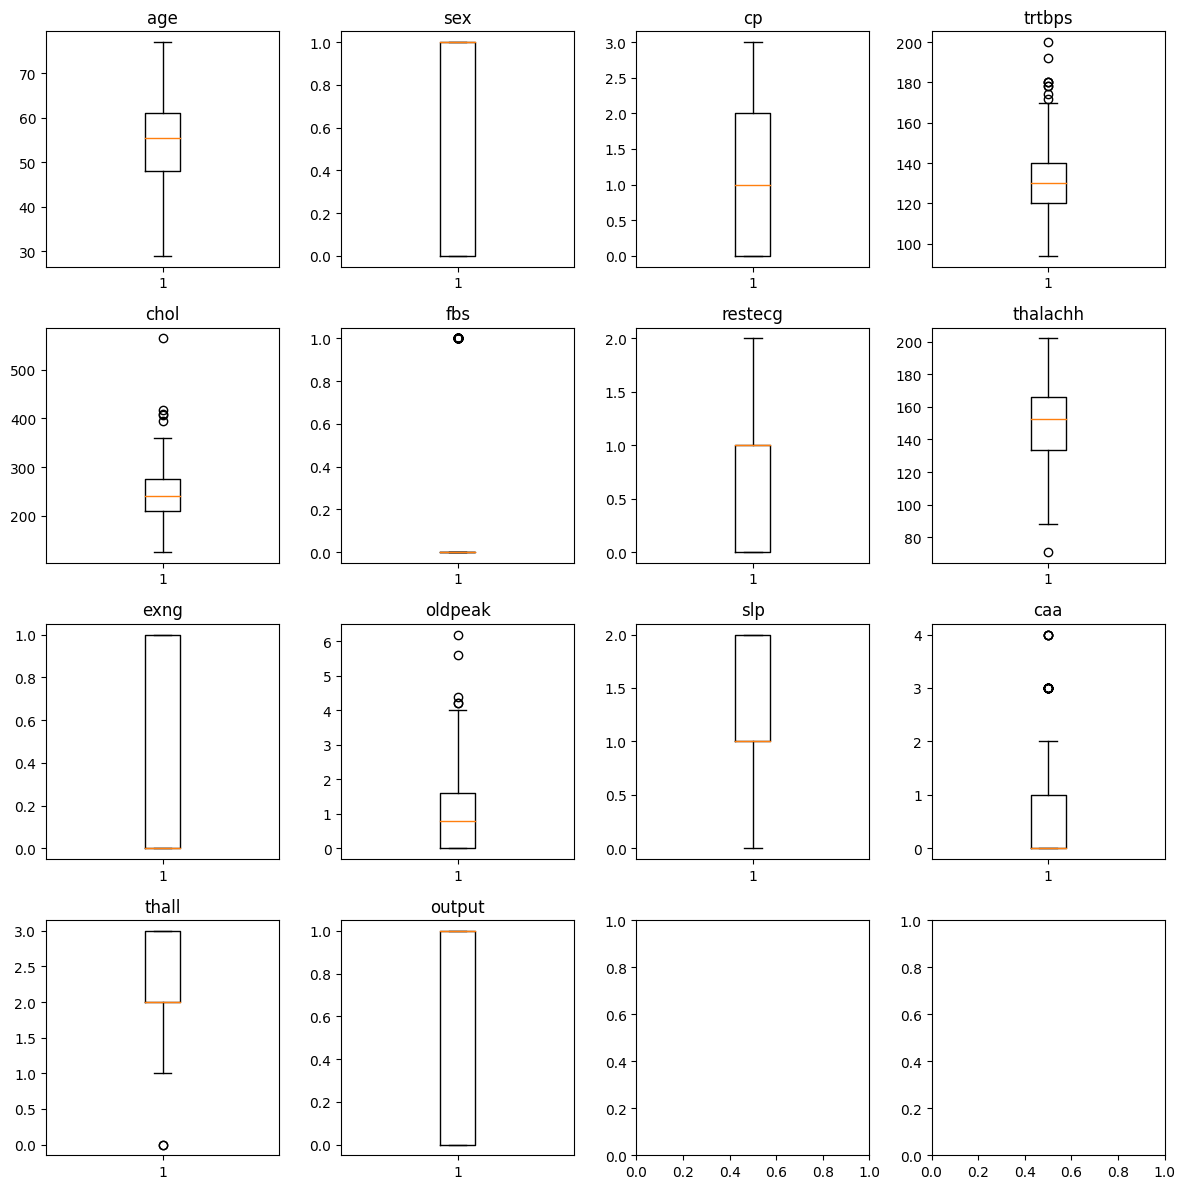

In [19]:
# Create a box plot for each variable
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.flatten()

for i, column in enumerate(data.columns):
    axs[i].boxplot(data[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


Thsi box plots are useful for identifying the potential outliers and understand the spread and central tendency of each variable in the dataset.

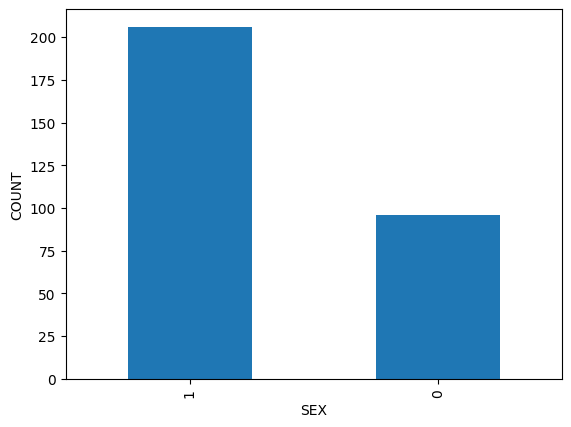

In [20]:
data['sex'].value_counts().plot(kind='bar')
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.show()

 '0' and '1' representing male and female, respectively
 There are more males than females in the survey. 

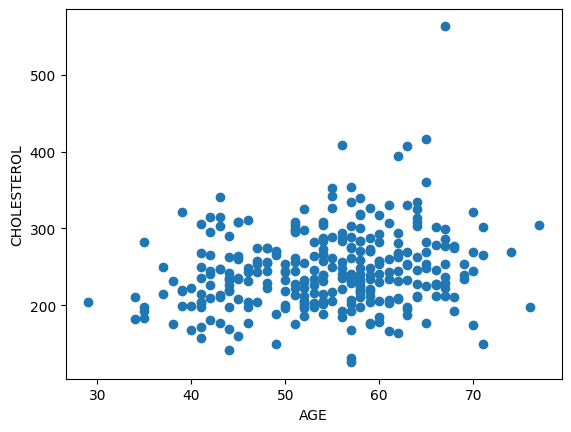

In [21]:
plt.scatter(data['age'], data['chol'])
plt.xlabel('AGE')
plt.ylabel('CHOLESTEROL')
plt.show()

This scatter plot visually represents the relationship between the 'age' and 'chol' variables. Each point in the plot corresponds to an individual in the dataset, and its position is determined by the 'age' and 'chol' values of that person.

In [22]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


This correlation matrix is helpful in understanding the relationships between different variables in the dataset.

According to the correlation analysis, we find the following positive correlations:

'caa,' 'chol,' and 'trtbps' have a positive correlation with 'age.'
'thall' has a positive correlation with 'sex.'
'cp' and ', thalachhslp' have a positive correlation with 'output.'. 

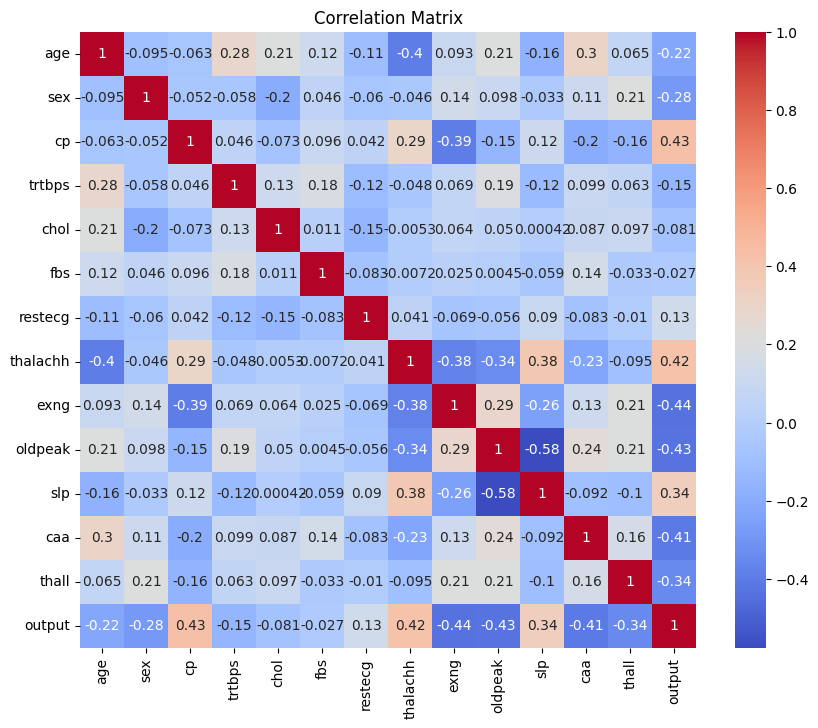

In [25]:
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

no highly correlated features.

In [26]:
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_with_output = numeric_data.corr()["output"]
print(correlation_with_output)


age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalachh    0.419955
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.408992
thall      -0.343101
output      1.000000
Name: output, dtype: float64


'cp' and 'slp', thalachh have a positive correlation with 'output.'. 

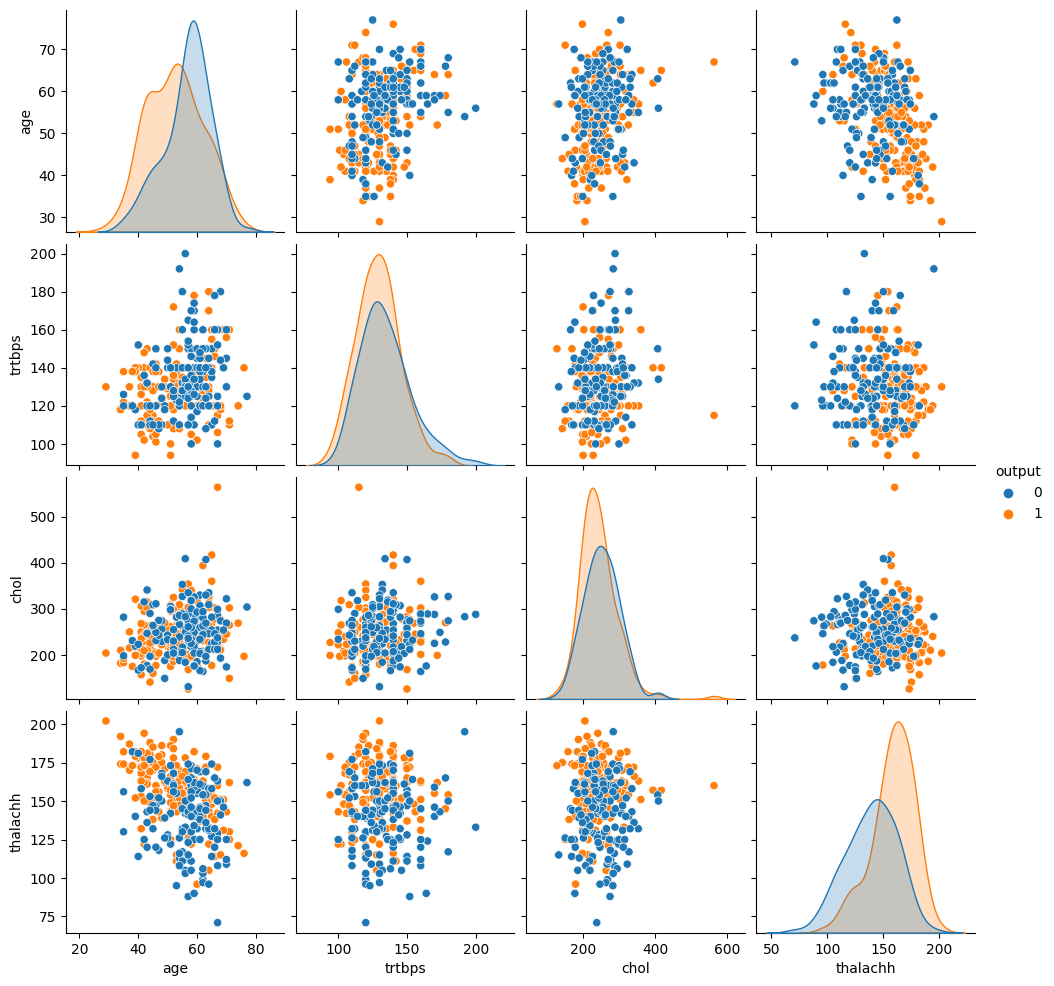

In [27]:
import seaborn as sns

sns.pairplot(data, vars=['age', 'trtbps', 'chol', 'thalachh'], hue='output')
plt.show()


no highly correlated features. 

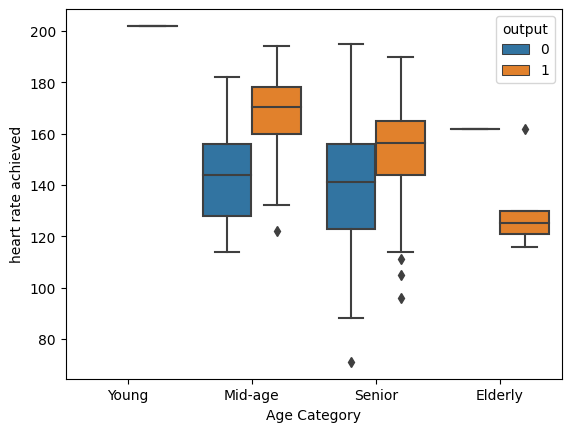

In [29]:
age_bins = [0, 30, 50, 70, np.inf]
age_labels = ['Young', 'Mid-age', 'Senior', 'Elderly']
data['age_category'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
age_category_counts = data['age_category'].value_counts()
table = pd.DataFrame({'Age Category': age_category_counts.index, 'Count': age_category_counts.values})

sns.boxplot(x='age_category', y='thalachh', hue='output', data=data)
plt.xlabel('Age Category')  # Label for the x-axis
plt.ylabel('heart rate achieved')      # Label for the y-axis
plt.show()


this can help in identifying how heart rate varies among different age groups and how it relates to the target variable ('output').

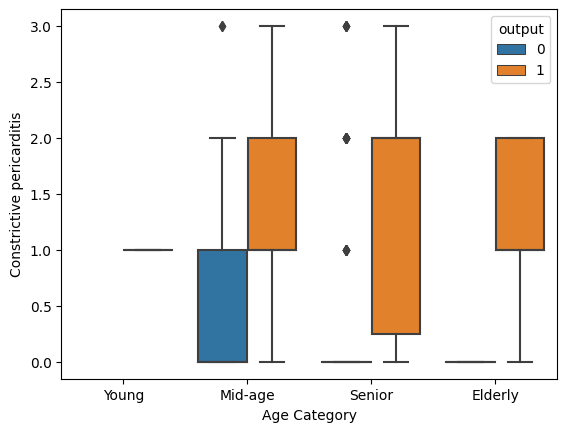

In [30]:
age_bins = [0, 30, 50, 70, np.inf]
age_labels = ['Young', 'Mid-age', 'Senior', 'Elderly']
data['age_category'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
age_category_counts = data['age_category'].value_counts()
table = pd.DataFrame({'Age Category': age_category_counts.index, 'Count': age_category_counts.values})

sns.boxplot(x='age_category', y='cp', hue='output', data=data)
plt.xlabel('Age Category')  # Label for the x-axis
plt.ylabel('Constrictive pericarditis')      # Label for the y-axis
plt.show()

This can help in identifying howConstrictive pericarditis varies among different age groups and how it relates to the target variable ('output').

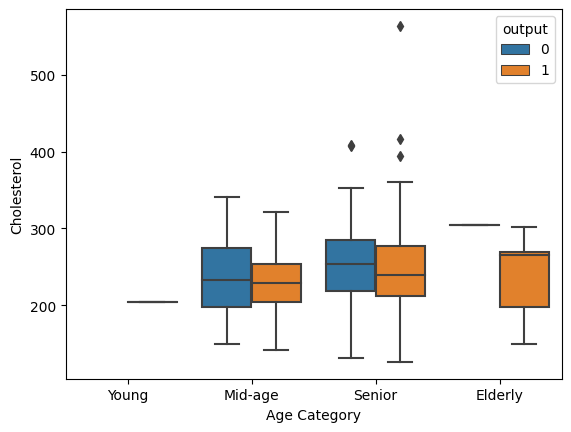

In [31]:
age_bins = [0, 30, 50, 70, np.inf]
age_labels = ['Young', 'Mid-age', 'Senior', 'Elderly']
data['age_category'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
age_category_counts = data['age_category'].value_counts()
table = pd.DataFrame({'Age Category': age_category_counts.index, 'Count': age_category_counts.values})

sns.boxplot(x='age_category', y='chol', hue='output', data=data)
plt.xlabel('Age Category')  # Label for the x-axis
plt.ylabel('Cholesterol')      # Label for the y-axis
plt.show()




This can help in identifying how Cholesterol level varies among different age groups and how it relates to the target variable ('output').

In [32]:
table = pd.DataFrame({'Age Category': age_category_counts.index, 'Count': age_category_counts.values})
print(table)

  Age Category  Count
0       Senior    202
1      Mid-age     93
2      Elderly      6
3        Young      1


Senior: There are 202 data points that belong to the "Senior" age category. These data points have ages within the range of 50 (inclusive) to 70 (exclusive), as per the age bins defined earlier.

Mid-age: There are 93 data points that fall into the "Mid-age" category. These data points have ages within the range of 30 (inclusive) to 50 (exclusive).

Elderly: There are 6 data points in the "Elderly" age category. These data points have ages greater than or equal to 70 (the last bin defined in the age_bins list).

Young: There is only 1 data point in the "Young" age category. This data point has an age less than 30 (the first bin defined in the age_bins list).

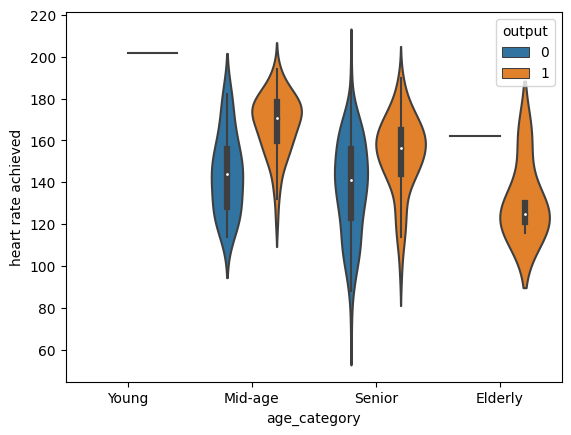

In [33]:
sns.violinplot(x='age_category', y='thalachh', hue='output', data=data)
plt.ylabel('heart rate achieved')      # Label for the y-axis
plt.show()


This helps to identify any potential patterns or differences in heart rate achieved across different age groups and output categories.
wider parts indicating higher data density.

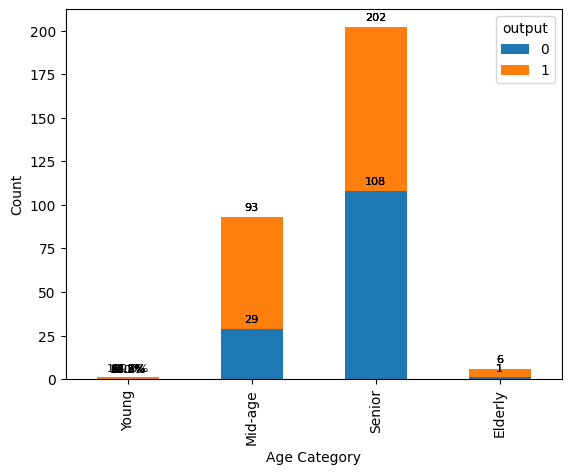

In [34]:
grouped_data = data.groupby(['age_category', 'output']).size().unstack()
ax = grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Age Category')
plt.ylabel('Count')

# Calculate percentages and annotate on bars
total_counts = grouped_data.sum(axis=1)
for i, age_category in enumerate(grouped_data.index):
    total_count = total_counts.loc[age_category]
    for j, output in enumerate(grouped_data.columns):
        count = grouped_data.loc[age_category, output]
        percentage = (count / total_count) * 100
        ax.bar_label(ax.containers[j], labels=[f'{percentage:.1f}%'], label_type='edge', fontsize=8, padding=3)

plt.show()




Mid-age, senior and elderly people tend to have heart failure than young people. 

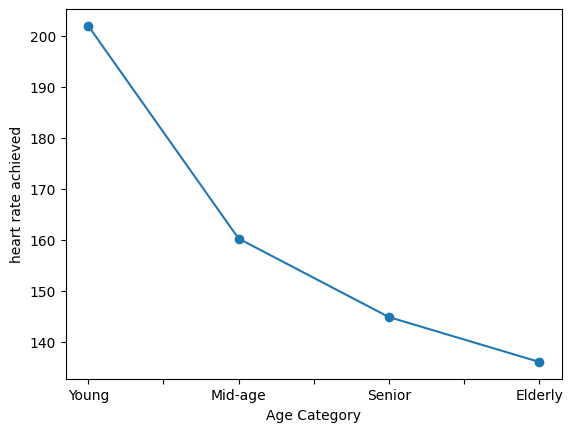

In [35]:
data.groupby('age_category')['thalachh'].mean().plot(marker='o')
plt.xlabel('Age Category')
plt.ylabel('heart rate achieved')
plt.show()


Young: 200 beats per minute (bpm)
Mid-age: 160 beats per minute (bpm)
Senior: 147 beats per minute (bpm)
Elderly: 135 beats per minute (bpm)

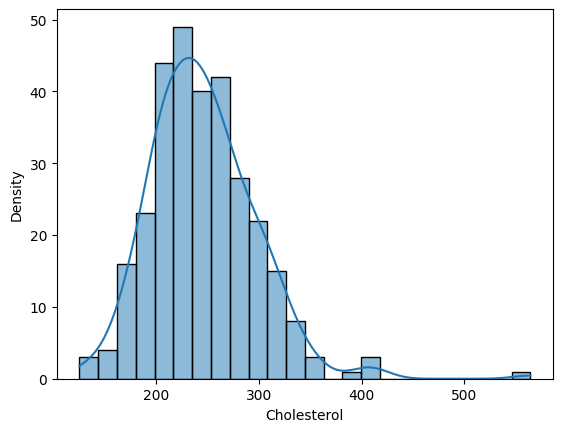

In [36]:
sns.histplot(data=data, x='chol', kde=True)
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.show()


Sligly right skwewd.

In [83]:
#pip install scipy

In [38]:
import scipy as stats
from scipy import stats
# T-test
t_statistic, p_value = stats.ttest_ind(data['age'], data['chol'])
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Hypothesis statement for T-test
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the mean age and cholesterol levels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the mean age and cholesterol levels.")





T-statistic: -63.53413422112122
P-value: 4.154401163024212e-269
Reject the null hypothesis: There is a significant difference between the mean age and cholesterol levels.


There is no statistically significant distinction between the average age and cholesterol levels of the observed data.

In [39]:
# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(data['sex'], data['output']))
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

# Hypothesis statement for Chi-square test
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant association between sex and heart disease presence.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between sex and heart disease presence.")


Chi-square statistic: 23.083879459669042
P-value: 1.5508552054949547e-06
Degrees of freedom: 1
Reject the null hypothesis: There is a significant association between sex and heart disease presence.


In [40]:
# ANOVA
data = pd.read_csv("D:\\Desktop\R by me\heart.csv")
f_statistic, p_value = stats.f_oneway(data['thalachh'], data['output'])
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Hypothesis statement for ANOVA
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in mean thalachh values between different heart disease outcomes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean thalachh values between different heart disease outcomes.")

F-statistic: 12833.311553706148
P-value: 0.0
Reject the null hypothesis: There is a significant difference in mean thalachh values between different heart disease outcomes.


In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the formula for the ANOVA
formula = 'output ~ age + sex + cp + trtbps + chol + fbs + restecg + thalachh + exng + oldpeak + slp + caa + thall'

# Fit the ANOVA model
model = ols(formula, data=data).fit()

# Perform the ANOVA analysis
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

# Hypotheses for each factor (independent variable)
factors = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'caa', 'thall']
alpha = 0.05  # Significance level

for factor in factors:
    # Extract the data for the current factor
    data_grouped = data[[factor, 'output']].groupby(factor)
    
    # Perform ANOVA for the current factor
    model_factor = ols('output ~ C(' + factor + ')', data=data).fit()
    anova_table_factor = sm.stats.anova_lm(model_factor, typ=2)
    
    # Get the F-statistic and p-value
    f_statistic = anova_table_factor['F'][0]
    p_value = anova_table_factor['PR(>F)'][0]
    
    # Print the results and test the hypotheses
    print(f"\nFactor: {factor}")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in 'output' across groups.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in 'output' across groups.")


             sum_sq     df          F        PR(>F)
age        0.011616    1.0   0.092590  7.611292e-01
sex        2.168379    1.0  17.284637  4.244938e-05
cp         3.181013    1.0  25.356570  8.401461e-07
trtbps     0.314555    1.0   2.507387  1.144073e-01
chol       0.088164    1.0   0.702777  4.025451e-01
fbs        0.010636    1.0   0.084784  7.711245e-01
restecg    0.195581    1.0   1.559021  2.128192e-01
thalachh   0.895086    1.0   7.134931  7.988188e-03
exng       0.986453    1.0   7.863240  5.386779e-03
oldpeak    0.824845    1.0   6.575029  1.084749e-02
slp        0.435490    1.0   3.471387  6.345322e-02
caa        2.657835    1.0  21.186204  6.248649e-06
thall      1.398341    1.0  11.146489  9.523132e-04
Residual  36.255404  289.0        NaN           NaN

Factor: age
F-statistic: 1.298474853545564
P-value: 0.11915678279281915
Fail to reject the null hypothesis. There is no significant difference in 'output' across groups.

Factor: sex
F-statistic: 25.79219115378873
P-val

Null Hypothesis (H0): There is no significant difference in 'output' across groups defined by the current factor.
Alternative Hypothesis (Ha): There is a significant difference in 'output' across groups defined by the current factor.

This analysis reveals that several factors, such as sex, chest pain, cholesterol, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, number of major vessels colored by fluoroscopy, and thallium stress test result, have a significant impact on the 'output' variable related to heart failure. However, age, resting blood pressure, and fasting blood sugar do not show significant differences in the 'output' variable among their respective groups.

In [42]:
#pip install statsmodels

In [44]:
from sklearn.linear_model import LogisticRegression

# Select predictor variables and target variable
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Print the coefficients and intercept
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Coefficients: [[ 0.01335288 -1.33635396  0.8024741  -0.01541769 -0.00322828 -0.08395405
   0.54651831  0.02998764 -0.786262   -0.48538877  0.52413207 -0.68670642
  -0.85185488]]
Intercept: [0.05817803]


C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.linear_model import LinearRegression

# Select predictor variables and target variable
X = data[['age', 'sex', 'cp', 'trtbps', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['chol']

# Fit multiple linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Print the coefficients and intercept
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [  1.08703781 -24.32535006  -2.83861109   0.11332667  -1.39794338
 -13.40612481   0.25338294   7.32386345   1.45323229   4.25110122
   0.87423337   9.41584312]
Intercept: 128.70735268793464


In [46]:
# Step 1: Split the Data
from sklearn.model_selection import train_test_split

# Assuming 'data' is your heart failure prediction dataset and 'output' is the target variable
X = data[['age', 'sex', 'cp', 'trtbps', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'chol']]
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Choose a Model
from sklearn.linear_model import LogisticRegression

# Choose the logistic regression model
model = LogisticRegression()

# Step 3: Train the Model
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", confusion_mat)

# Step 5: Model Improvement (if necessary)

# Step 6: Interpret and Communicate Results
# Interpret the model coefficients, feature importances, or any other relevant information to gain insights into heart failure prediction.



Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922
ROC-AUC Score: 0.8841594827586207
Confusion Matrix:
 [[25  4]
 [ 3 29]]


C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7868852459016393
Confusion Matrix:
[[26  3]
 [10 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



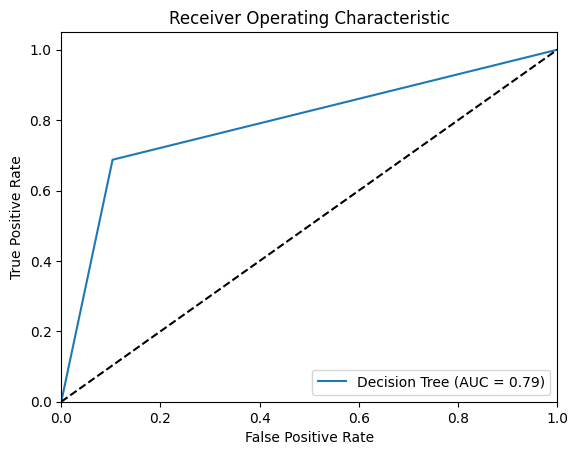

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Select predictor variables and target variable
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC curve and AUC
probs = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Explanation of the Classification Report:For class 0, the precision is 0.79, indicating that 79% of the predicted instances as class 0 are correct. The recall is 0.93, meaning that the model correctly identifies 93% of the actual class 0 instances. The F1-score is 0.86, which is the harmonic mean of precision and recall for class 0.
For class 1, the precision is 0.93, indicating that 93% of the predicted instances as class 1 are correct. 
The recall is 0.78, meaning that the model correctly identifies 78% of the actual class 1 instances. 
The F1-score is 0.85 for class 1.The accuracy value of 0.85 represents the overall accuracy of the model, which is calculated as the proportion of correctly classified instances out of the total instances (61 in this case).
The macro average and weighted average provide aggregated metrics by considering the overall performance across all classes, weighted by the number of instances in each class.


With an AUC of 0.86, the classifier has a strong ability to differentiate between positive and negative instances across various classification thresholds. It indicates that the classifier can effectively balance the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity).

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform cross-validation on the training data
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the cross-validation scores and test accuracy
print("Cross-validation Scores:", cv_scores)
print("Average Cross-validation Score:", cv_scores.mean())
print("Test Accuracy:", accuracy)


Cross-validation Scores: [0.79591837 0.83673469 0.79166667 0.85416667 0.77083333]
Average Cross-validation Score: 0.8098639455782312
Test Accuracy: 0.8524590163934426


In [48]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[25  4]
 [ 5 27]]


The classification model achieved the following results on the test set:

True Positives (TP): 27
True Negatives (TN): 25
False Positives (FP): 4
False Negatives (F
N): 5
Overall, the model shows a relatively good performance in correctly identifying instances of both classes (class 0 and class 1). It correctly predicted 25 instances of class 0 and 27 instances of class 1. However, it made some errors in misclassifying 4 instances of class 0 as class 1 and 5 instances of class 1 as class 0.

In [44]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



the classification model shows good performance with an accuracy of 89%. It demonstrates a high level of precision and recall for both classes, indicating that it can effectively identify instances of both class 0 and class 1. The F1-scores are also high, suggesting a well-balanced performance in terms of precision and recall. Overall, the model appears to be reliable and effective for the classification task.

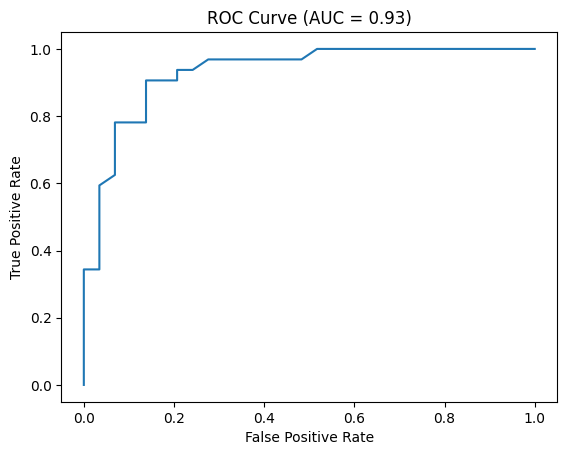

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities for positive class
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()


 An AUC of 0.93 suggests that the model is performing exceptionally well in its binary classification task.

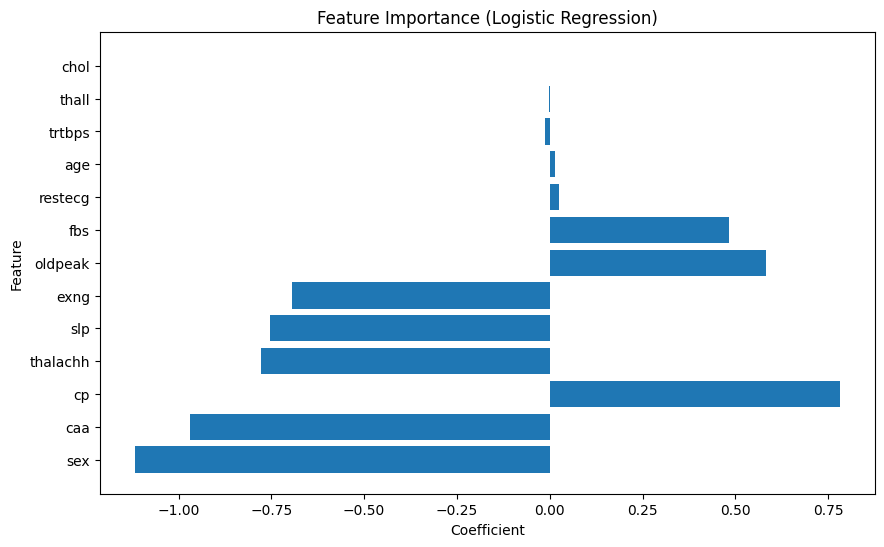

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model named 'model'
coefficients = model.coef_[0]
feature_names = X.columns

# Sort feature names and coefficients in descending order of absolute magnitude
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.show()


In [47]:
pip install xgboost


[notice] A new release of pip is available: 23.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Select predictor variables and target variable
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNeighbors Accuracy:", knn_accuracy)

# Initialize and fit DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Initialize and fit RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Initialize and fit GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Initialize and fit XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)


KNeighbors Accuracy: 0.6557377049180327
Decision Tree Accuracy: 0.8032786885245902
Random Forest Accuracy: 0.8688524590163934
Gradient Boosting Accuracy: 0.8524590163934426
XGBoost Accuracy: 0.8524590163934426


We can conclude that the Random Forest model achieved the highest accuracy of 86.89%, making it the best-performing model among the ones listed.

In [51]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select predictor variables and target variable
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Get feature importances
feature_importances = rf.feature_importances_
importance_dict = dict(zip(X.columns, feature_importances))
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importances
print("Feature Importances:")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")

# Feature Selection: Remove features with low importances
selected_features = [feature for feature, importance in sorted_importances if importance > 0.05]
X_selected = X[selected_features]

# Re-split the data with the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and fit the model with selected features
rf_selected = RandomForestClassifier()
rf_selected.fit(X_train_selected, y_train)

# Make predictions on the testing data with selected features
y_pred_selected = rf_selected.predict(X_test_selected)

# Calculate accuracy with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Random Forest Accuracy with Selected Features:", accuracy_selected)


Random Forest Accuracy: 0.8524590163934426
Feature Importances:
oldpeak: 0.12915759890947323
caa: 0.12693558742434047
thall: 0.11692399946483256
thalachh: 0.10547873637364229
cp: 0.10405461243961123
age: 0.09094398490565261
chol: 0.07357926031648654
exng: 0.07107025523363367
trtbps: 0.06806325191954687
slp: 0.04896736733217485
sex: 0.03346488292792345
restecg: 0.0203264856556563
fbs: 0.011033977097025898
Random Forest Accuracy with Selected Features: 0.819672131147541


In [52]:
# Feature Selection: Remove features with low importances
selected_features = [feature for feature, importance in sorted_importances if importance > 0.05]
X_selected = X[selected_features]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['oldpeak', 'thalachh', 'thall', 'caa', 'cp', 'age', 'chol', 'trtbps', 'exng']


In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select predictor variables and target variable
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Model Optimization with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Optimized Random Forest Accuracy:", accuracy)



Optimized Random Forest Accuracy: 0.8852459016393442


he optimized Random Forest model with an accuracy of 88.52% is promising and indicates that it is making accurate predictions on the test dataset.

Random Forest Accuracy: 0.8688524590163934


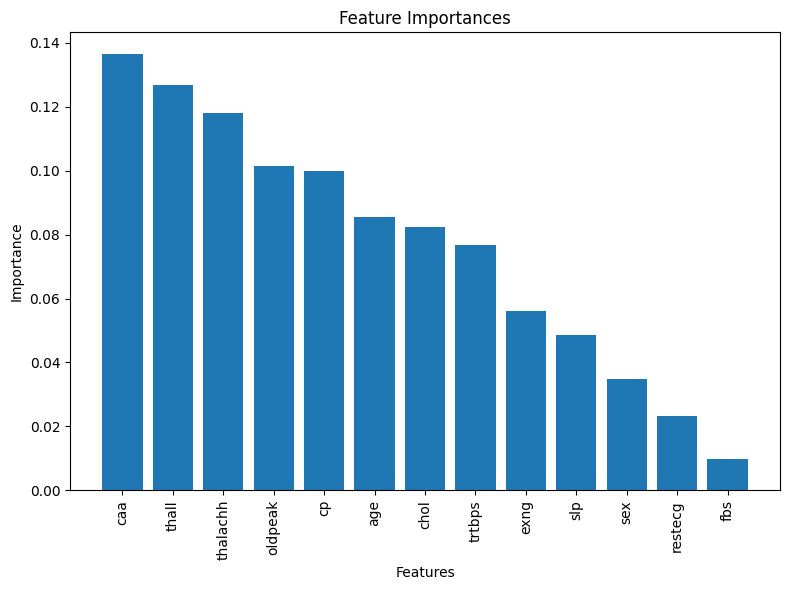

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Select predictor variables and target variable
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Interpretation and Insights
# Calculate feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


In [64]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Select predictor variables and target variable
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Model Deployment and Monitoring
# Save the trained model
model_file = "random_forest_model.pkl"
joblib.dump(rf, model_file)

# Load the model later
loaded_model = joblib.load(model_file)

# Prepare new data for prediction
new_data = pd.DataFrame({
    'age': [65, 45, 70],
    'sex': [1, 0, 1],
    'cp': [2, 1, 0],
    'trtbps': [130, 140, 150],
    'chol': [250, 200, 220],
    'fbs': [0, 1, 0],
    'restecg': [1, 0, 1],
    'thalachh': [150, 170, 160],
    'exng': [0, 1, 0],
    'oldpeak': [2.5, 1.0, 0.5],
    'slp': [1, 2, 0],
    'caa': [0, 1, 2],
    'thall': [2, 1, 0]
})

# Make predictions on new data
new_predictions = loaded_model.predict(new_data)

print("New Data Predictions:")
print(new_predictions)


Random Forest Accuracy: 0.8360655737704918
New Data Predictions:
[0 1 0]


#Further Analysis and Research

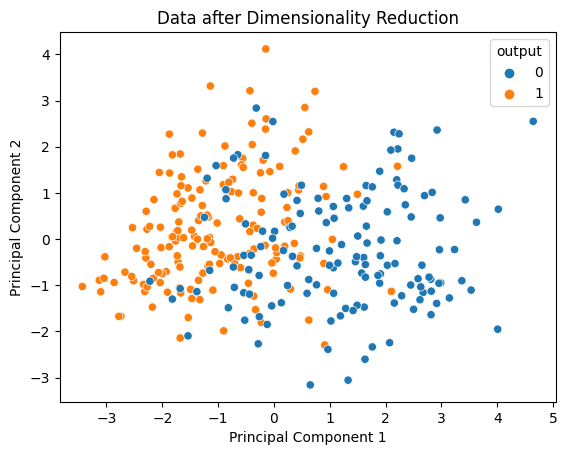

C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


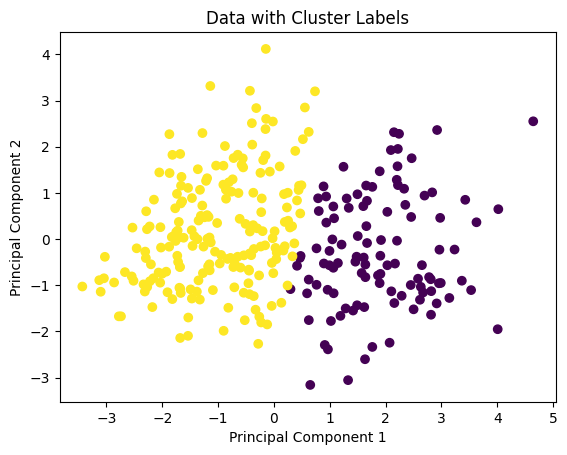

In [65]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for the reduced data
pca_data = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_data['output'] = y

# Plot the data after dimensionality reduction
sns.scatterplot(x='PC1', y='PC2', hue='output', data=pca_data)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data after Dimensionality Reduction")
plt.show()

# Perform clustering on the reduced data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
pca_data['Cluster'] = cluster_labels

# Plot the data with cluster labels
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Cluster'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data with Cluster Labels")
plt.show()



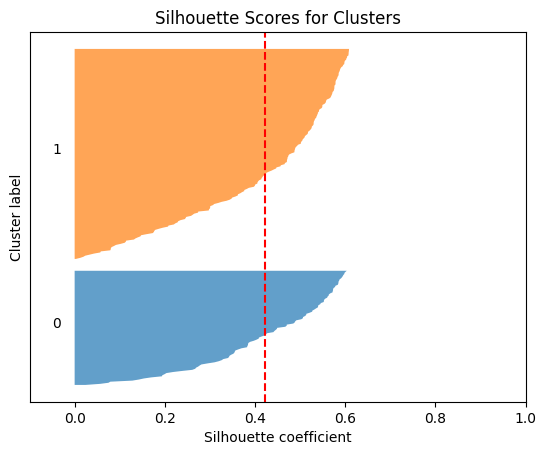

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette scores for each data point
silhouette_vals = silhouette_samples(X_pca, cluster_labels)

# Calculate the average silhouette score for all data points
avg_silhouette = silhouette_score(X_pca, cluster_labels)

# Create a bar plot of the silhouette scores
fig, ax = plt.subplots()
y_lower = 10

for i in range(2):
    cluster_i_vals = silhouette_vals[cluster_labels == i]
    cluster_i_vals.sort()
    cluster_size = cluster_i_vals.shape[0]
    y_upper = y_lower + cluster_size

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_vals, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster label")
ax.axvline(x=avg_silhouette, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.title("Silhouette Scores for Clusters")
plt.show()


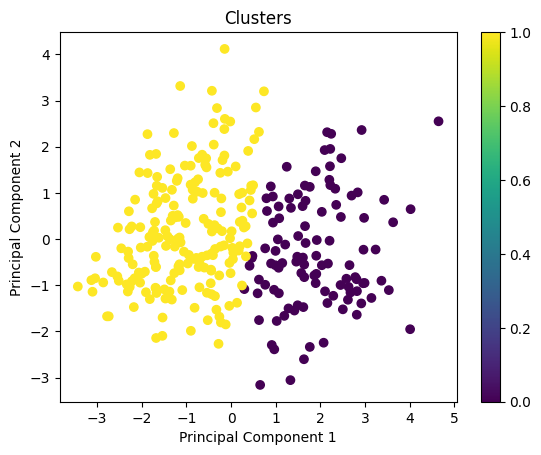

In [66]:
import matplotlib.pyplot as plt

# Create a scatter plot of the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.colorbar()
plt.show()


C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

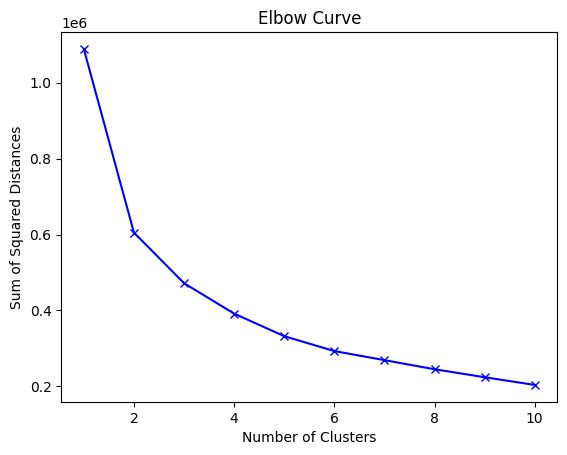

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a list to store the sum of squared distances for each number of clusters
sse = []

# Define the range of cluster numbers to try
k_range = range(1, 11)

# Iterate over each number of clusters and calculate the sum of squared distances
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')
plt.show()


In [68]:
from sklearn.cluster import KMeans

# Create a K-means clustering object
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the K-means model to your data
kmeans.fit(X)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_


C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


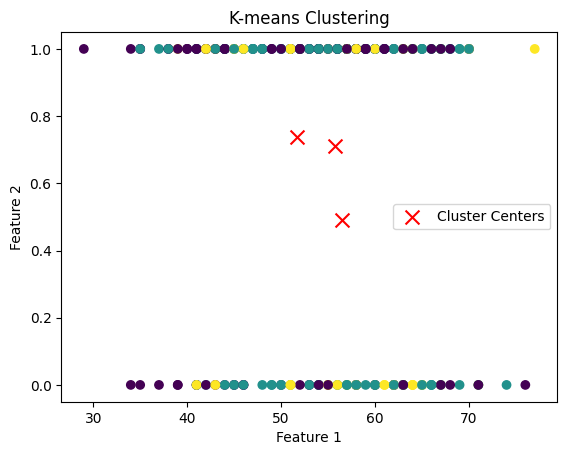

In [69]:
import matplotlib.pyplot as plt

# Create a scatter plot of the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()


In [70]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Calculate the Davies-Bouldin score
db_score = davies_bouldin_score(X, cluster_labels)
print("Davies-Bouldin Score:", db_score)


Silhouette Score: 0.2877647413673084
Davies-Bouldin Score: 1.1262343584899137


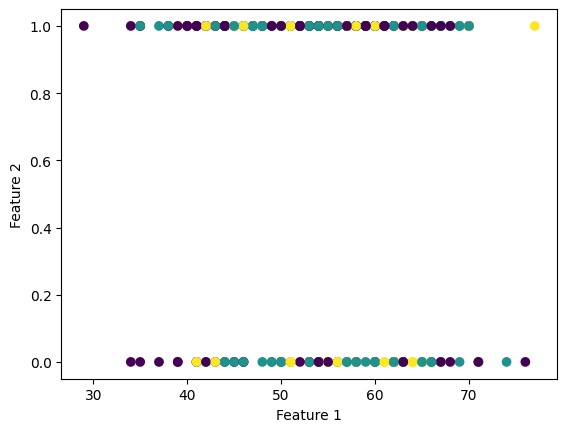

In [71]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data points with cluster labels as colors
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


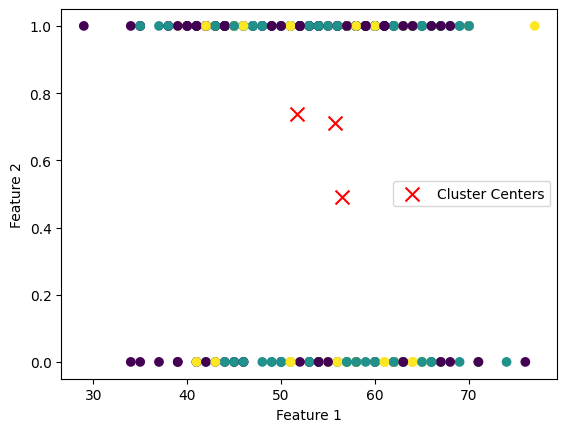

In [72]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data points with cluster labels as colors
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100, label='Cluster Centers')

plt.legend()
plt.show()


C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Chandi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

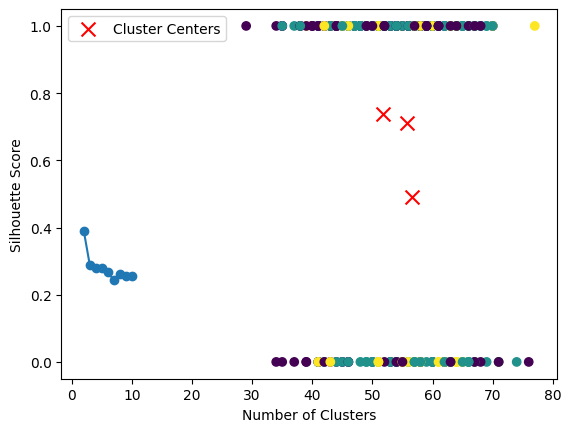

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Create a scatter plot of the data points with cluster labels as colors
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100, label='Cluster Centers')

# Define the maximum number of clusters
max_clusters = 10

# Calculate the silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, max_clusters+1):
    # Fit K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_samples(X, cluster_labels).mean()
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.legend()
plt.show()


In [74]:
# Find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal Number of Clusters:", optimal_clusters)


Optimal Number of Clusters: 2
